In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Cargue la imagen de trabajo y visualícela.

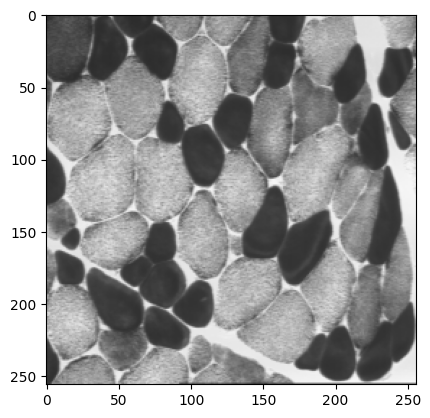

In [2]:
muscle = cv2.imread("./images/muscle.png")

plt.imshow(muscle, cmap= 'gray', vmin = 0, vmax= 255)
plt.show()

# Visualice su histograma y escoja un valor S de nivel de gris que permita separar aproximadamente las fibras oscuras del resto de la imagen. ¿Cuál es este valor?

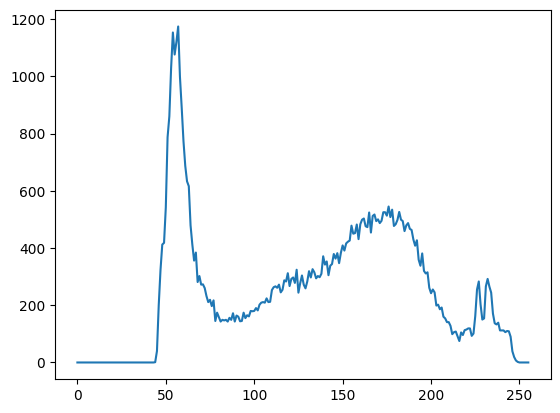

In [3]:
hist = cv2.calcHist([muscle],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()

Se puede ver que las fibras oscuras son la primera montaña, la cual acaba aproximadamente en el color 80. Es por esto que se toma el valor S = 80

In [4]:
S = 80

# Efectúe una calibración del histograma (ver primer punto de este taller) entre los valores S y S +1 de la imagen. Visualice la imagen resultado y su histograma. ¿Cuál es su conclusión?

In [5]:
def get_ab(li, ls):
    b = ((255 * li) / (li - ls))
    a = (255 / (ls - li))

    return a,b
a,b = get_ab(S, S + 1)
a,b

(255.0, -20400.0)

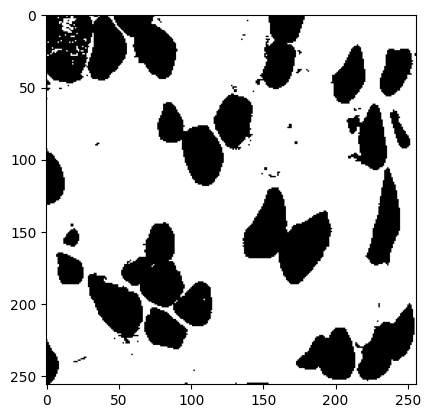

In [6]:
new_img = muscle.copy()
for i in range(len(new_img)):
    for j in range(len(new_img[0])):
        v = new_img[i][j][0]
        new_img[i][j] = max(min( a*new_img[i][j][0] + b, 255 ) , 0)
plt.imshow(new_img, cmap= 'gray', vmin = 0, vmax= 255)
plt.show() 

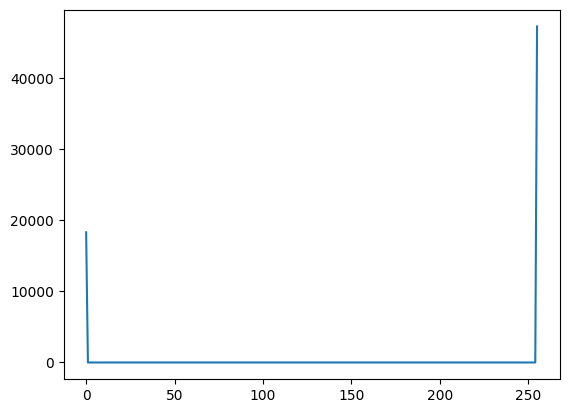

In [7]:
hist = cv2.calcHist([new_img],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()

Se observa que los pixeles más oscuros que S se vuelven negros (0) y los más claros que S se vuelven blancos (255). Esto logra que las fibras musculares se destaquen y el resto de información se pierde.

# Repita la misma operación utilizando el módulo de umbralización simple, con el umbral S. ¿Conclusión?

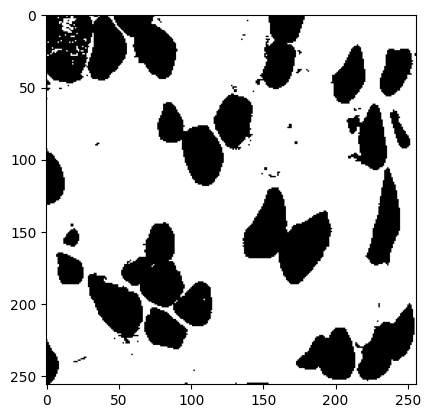

In [10]:
thres_value, thres_image = cv2.threshold(muscle, S, 255, cv2.THRESH_BINARY)
plt.imshow(thres_image, cmap= 'gray', vmin = 0, vmax= 255)
plt.show() 

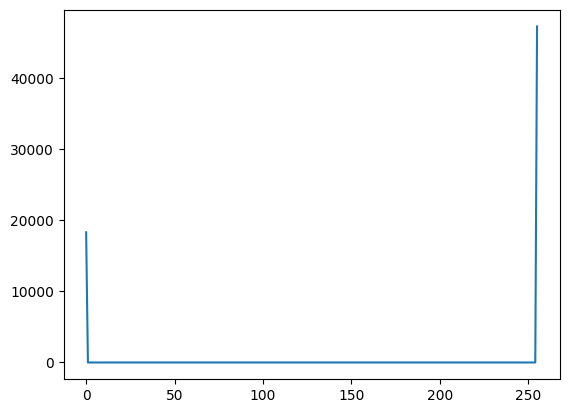

In [19]:
hist = cv2.calcHist([thres_image],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()

In [20]:
bool((new_img == thres_image).all())

True

Como se puede apreciar, se obtiene exactamente la misma imagen, ya que los pixeles con colores mayores a S se vuelven blancos y los más oscuros que S se vuelven negros. Por lo que ambas transformaciones tienen el mismo efecto en la imagen..

# ¿Qué resultado dan los métodos de umbralización automática (Otsu) basados sobre la varianza? ¿Cómo eligen estos métodos el umbral a aplicar? Visualice las imágenes resultado y sus histogramas.

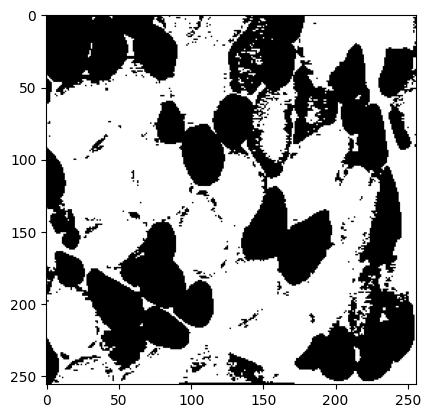

In [29]:
thres_value, thres_image = cv2.threshold(cv2.cvtColor(muscle, cv2.COLOR_BGR2GRAY), 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thres_image, cmap= 'gray', vmin = 0, vmax= 255)
plt.show() 

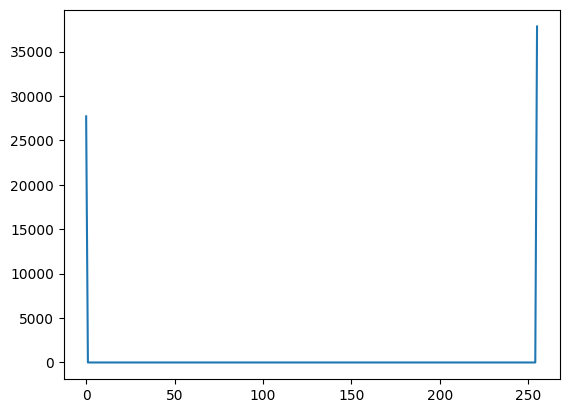

In [30]:
hist = cv2.calcHist([thres_image],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()

El método de Otsu determina automáticamente el mejor umbral para segmentar una imagen analizando su histograma de intensidades. Busca el valor que mejor separa dos grupos de píxeles. Para ello, prueba todos los umbrales posibles y elige el que logra la mayor diferencia entre estos grupos, asegurando que cada uno sea lo más homogéneo posible internamente y lo más distinto entre sí. Sirve cuando la imagen tiene zonas claramente diferenciadas, como las fibras musculares del resto de elementos de la imagen.

Utilizando Otsu se obtiene un resultado distinto, esto debido a que hay más pixeles de color negro que con la umbralización anterior. Esto se debe a que no se define el umbral manualmente con respecto al color de las fibras y este se calcula automaticamente. Esto hace que las fibras no se distingan tanto ya que el umbral calculado es diferente al más optimo para diferenciar las fibras.